### LogP dataset:

In [1]:
import torch.optim

from dglchem.datasets import LogP
data = LogP(log=True) 

SMILES c1cc(C)ccc1O[Si]12OCCN(CCO1)CCO2 in index 4816 contains the atom Si that is not permitted and will be ignored.
SMILES CC1=CC=C(O[Si]23OCCN(CCO2)CCO3)C=C1 in index 4817 contains the atom Si that is not permitted and will be ignored.
SMILES [H]C1=C([H])C(=C([H])C([H])=C1O[Si]12OC([H])([H])C([H])([H])N(C([H])([H])C([H])([H])O1)C([H])([H])C([H])([H])O2)C([H])([H])[H] in index 4818 contains the atom Si that is not permitted and will be ignored.
SMILES c3cc(C)ccc3O[Si]12OCCN(CCO2)CCO1 in index 4819 contains the atom Si that is not permitted and will be ignored.
SMILES Cc1ccc(cc1)O[Si]12OCCN(CCO1)CCO2 in index 4820 contains the atom Si that is not permitted and will be ignored.
SMILES Cc1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 in index 4821 contains the atom Si that is not permitted and will be ignored.
SMILES c1ccc(Cl)cc1O[Si]12OCCN(CCO1)CCO2 in index 6328 contains the atom Si that is not permitted and will be ignored.
SMILES [H]C1=C([H])C(O[Si]23OC([H])([H])C([H])([H])N(C([H])([H])C([H])([H])O

### Example outputs:

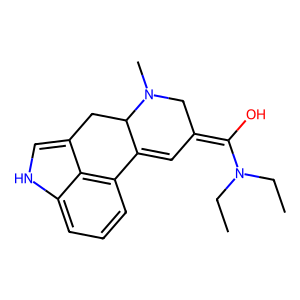

In [2]:
data.draw_smile(10)

### Analysis:

Loaded dataset.


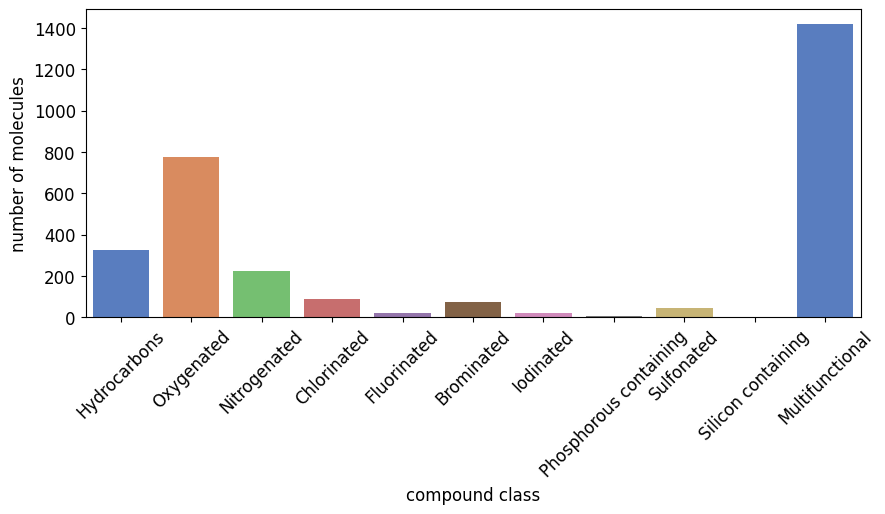

In [6]:
from dglchem.utils import DataSet
from dglchem.utils import compound_nums_chart

data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')
compound_nums_chart(data.smiles, fig_size=(10,4))

In [1]:
from dglchem.utils import DataSet
data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')
data.weight_vs_target_plot(pre_standardization=True)

Loaded dataset.


ValueError: Data was not loaded in from a raw file, this configuration is not possible.

Loaded dataset.


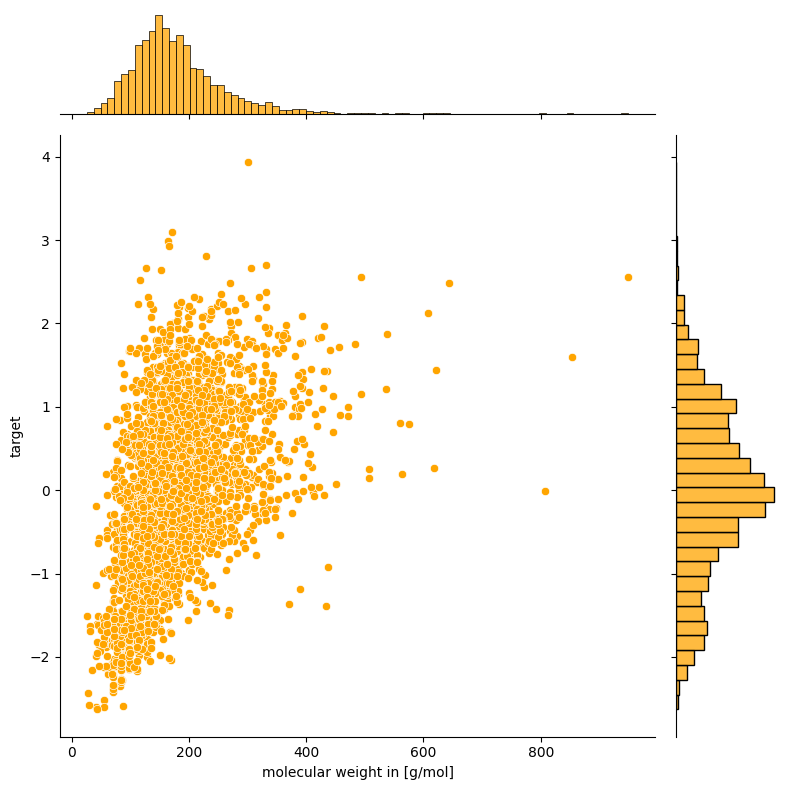

In [9]:
%matplotlib inline

from dglchem.utils import DataSet
data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')
data.weight_vs_target_plot(fig_height=3, save_fig=True)

Loaded dataset.


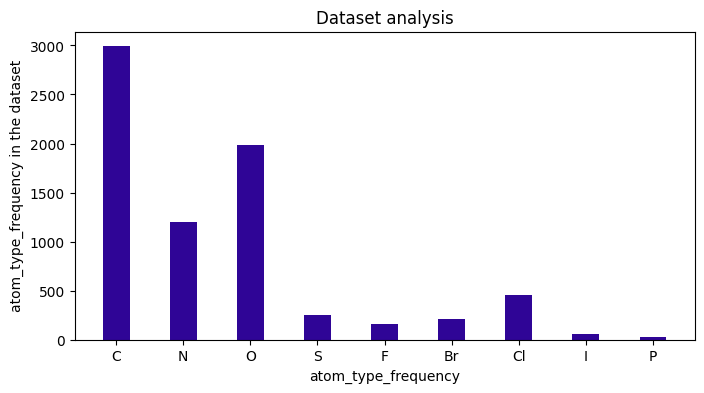

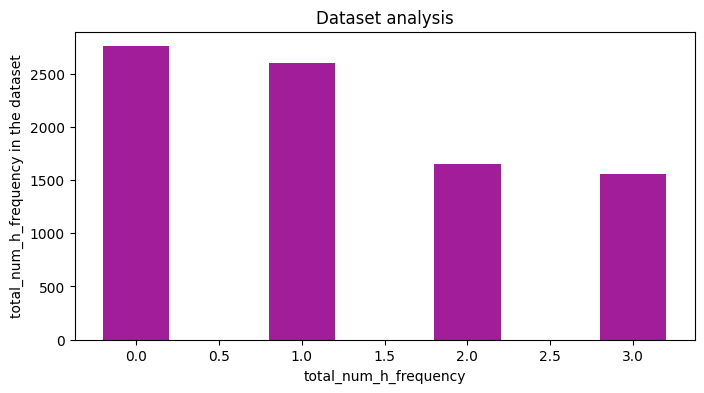

In [2]:
%matplotlib inline

from dglchem.utils import DataSet
data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')

results, figures = data.analysis(download=True, plots=['atom_type_frequency','total_num_h_frequency'], fig_size=[8,4])

### Butina clustering:

In [11]:
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils.data_splitting import taylor_butina_clustering
data = BradleyDoublePlus()

clusters = taylor_butina_clustering(data, threshold=0.5)

[0 0 0 ... 0 0 0]
2508
67
68
77
78
85
105
118
156
173
174
177
194
206
240
256
257
259
261
265
268
277
279
298
313
328
341
390
499
514
515
553
557
558
716
728
782
816
825
867
941
943
1000
1054
1069
1252
1306
1308
1309
1310
1343
1504
1505
1506
1507
1513
1514
1515
1602
1611
1636
1664
1939
1940
2073
2094
2095
2096
2151
2187
2206
2221
2265
2266
2360
2362
2403
2494
2576
2597
2606
2630
2768
2771
2812
2849
2868
2911
2966
2967
132
301
353
375
488
577
590
606
755
819
829
878
939
942
966
973
1075
1342
1349
1509
1541
1591
1596
1610
1621
1729
1755
1837
1895
1973
1975
2043
2103
2211
2229
2426
2477
2510
2556
2557
2600
2687
2796
2877
2865
940
1425
1518
1606
1826
2030
2108
2429
2564
2655
2855
1297
801
933
1064
1296
1316
1457
1493
1874
2075
2126
2148
2322
2340
2358
2544
2562
2572
2582
2783
2833
2994
1588
531
600
800
1088
1137
1155
1386
1397
1576
1730
1764
1769
1813
1947
2524
2618
2678
2943
2701
144
870
1114
1163
1282
1312
1659
2062
2100
2192
2203
2388
2415
2501
2519
2650
2953
1537
1462
1475
2699
50
146


## GNN Model:

In [1]:
from dglchem.utils import DataSet

data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')

train, test, val = data.get_splits()
print(train[1:10])

Loaded dataset.
[Data(x=[8, 174], edge_index=[2, 14], edge_attr=[14, 15], y=[1]), Data(x=[9, 174], edge_index=[2, 16], edge_attr=[16, 15], y=[1]), Data(x=[13, 174], edge_index=[2, 28], edge_attr=[28, 15], y=[1]), Data(x=[6, 174], edge_index=[2, 12], edge_attr=[12, 15], y=[1]), Data(x=[3, 174], edge_index=[2, 6], edge_attr=[6, 15], y=[1]), Data(x=[3, 174], edge_index=[2, 4], edge_attr=[4, 15], y=[1]), Data(x=[12, 174], edge_index=[2, 24], edge_attr=[24, 15], y=[1]), Data(x=[24, 174], edge_index=[2, 46], edge_attr=[46, 15], y=[1]), Data(x=[12, 174], edge_index=[2, 26], edge_attr=[26, 15], y=[1])]


In [2]:
print(f'Node feature dimension: {data.num_node_features}')
print(f'Edge feature dimension: {data.num_edge_features}')

Node feature dimension: 174
Edge feature dimension: 15


### Model definition:

In [3]:
from dglchem.utils import DataSet
from dglchem.models import MGConv
import torch

model = MGConv(num_layers=5, edge_hidden_dim=64, node_hidden_dim=64, 
               node_dim=data.num_node_features, edge_dim=data.num_edge_features)
print(model)

device = torch.device('cpu')

MGConv(
  (gnn_layers): ModuleList(
    (0-4): 5 x MGConvLayer()
  )
  (lin_pred): Linear(in_features=64, out_features=1, bias=True)
)


### Loss and Optimizer

In [4]:
from torch import nn

loss_func = nn.functional.mse_loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

### Training

In [5]:
from dglchem.utils import train_model

train_loss, val_loss = train_model(model = model,
                                   loss_func = loss_func,
                                   optimizer = optimizer,
                                   train_data_loader= train,
                                   val_data_loader = val,
                                   epochs=100,
                                   early_stopping=True,
                                   patience=10)

epoch=95, training loss= 0.266, validation loss= 0.273: 100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


### Loss plot

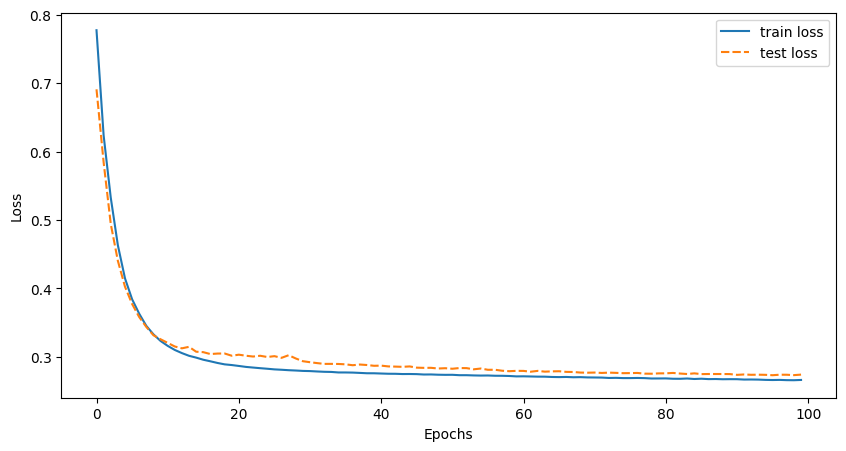

In [6]:
from dglchem.utils import loss_plot
loss_plot([train_loss, val_loss], ['train loss', 'test loss'])

### Testing

In [7]:
from dglchem.utils import test_model
test_model(model = model,
           test_data_loader= test,
           loss_func= loss_func)

100%|██████████| 10/10 [00:00<00:00, 136.41it/s]

Test loss: 0.275


0.27503849267959596